In [ ]:
# Bharat Intern Task : Stock Prediction
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [ ]:
# Loading and Preprocessing
data = pd.read_csv('Amazon.csv')
data = data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

In [5]:
# Preparing Sequences
X = []
y = []
for i in range(60, len(data)):
    X.append(data[i-60:i, 0])
    y.append(data[i, 0])
X = np.array(X)
y = np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [6]:
# Build and Train LSTM Model
model = Sequential() 
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=100, batch_size=32)

Epoch 1/100
5/5 [==============================] - 7s 68ms/step - loss: 0.1513
Epoch 2/100
5/5 [==============================] - 0s 65ms/step - loss: 0.0273
Epoch 3/100
5/5 [==============================] - 0s 61ms/step - loss: 0.0183
Epoch 4/100
5/5 [==============================] - 0s 62ms/step - loss: 0.0126
Epoch 5/100
5/5 [==============================] - 0s 63ms/step - loss: 0.0141
Epoch 6/100
5/5 [==============================] - 0s 61ms/step - loss: 0.0069
Epoch 7/100
5/5 [==============================] - 0s 62ms/step - loss: 0.0079
Epoch 8/100
5/5 [==============================] - 0s 62ms/step - loss: 0.0061
Epoch 9/100
5/5 [==============================] - 0s 61ms/step - loss: 0.0056
Epoch 10/100
5/5 [==============================] - 0s 60ms/step - loss: 0.0056
Epoch 11/100
5/5 [==============================] - 0s 63ms/step - loss: 0.0053
Epoch 12/100
5/5 [==============================] - 0s 63ms/step - loss: 0.0051
Epoch 13/100
5/5 [==============================]

In [7]:
# Prediction Making
predictions = model.predict(X)
predictions = scaler.inverse_transform(predictions)

5/5 [==============================] - 2s 28ms/step


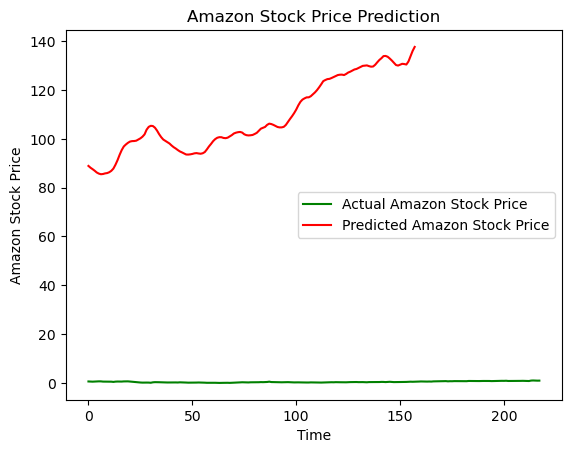

In [8]:
# Actual vs Predicted Prices
plt.plot(data, color='green', label='Actual Amazon Stock Price')
plt.plot(predictions, color='red', label='Predicted Amazon Stock Price')
plt.title('Amazon Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Amazon Stock Price')
plt.legend()
plt.show()

In [9]:
# Data For Future Predictions 
future_X = data[-60:]
future_X = scaler.transform(future_X)
future_X = np.reshape(future_X, (1, future_X.shape[0], 1))

In [10]:
# Make Future Predictions 
future_predictions = []
for i in range(30):
    prediction = model.predict(future_X)
    future_predictions.append(prediction[0, 0])
    prediction = np.reshape(prediction, (1, 1, 1))
    future_X = np.append(future_X[:, 1:, :], prediction, axis=1)


future_predictions = np.array(future_predictions).reshape(-1, 1)
future_predictions = scaler.inverse_transform(future_predictions)

1/1 [==============================] - 0s 46ms/step


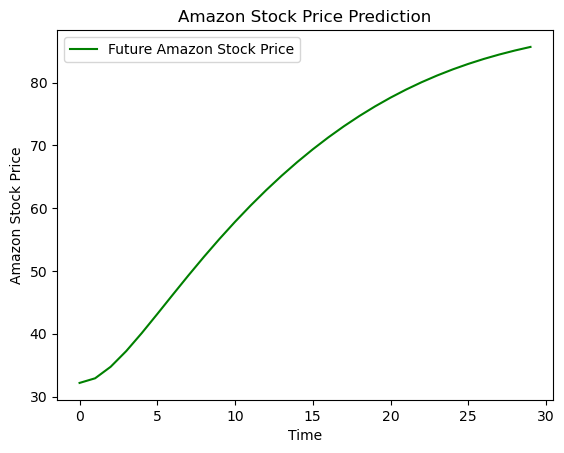

In [11]:
# Plot the future predictions
plt.plot(future_predictions, color='green', label='Future Amazon Stock Price')
plt.title('Amazon Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Amazon Stock Price')
plt.legend()
plt.show()